Project - Regression Model for Used Car Price Analysis

Import module / library


In [206]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats


Connect source

In [207]:
# Load source (csv)
df = pd.read_csv("Car details v3.csv")

# Show data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Checking data

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


We can see there's null values on mileage, engine, max_power, torque, and seats
We're going to do some cleanup first

In [209]:
# Count data inside variable fuel
fuel_counts = df["fuel"].value_counts()

# shows result
print(fuel_counts)


fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64


In [210]:
# Count data inside variable fuel
seats_counts = df["seats"].value_counts()

# shows result
print(seats_counts)

seats
5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64


We will focus our analysis on "common cars" and exclude vehicles that use gas-based fuels such as CNG and LPG, as well as cars with seating capacities exceeding 8.


While we're at it, we'll also clean some other columns.

In [211]:
# Only use "diesel" and "petrol" on [fuel]
df_clean = df[df["fuel"].isin(["Diesel", "Petrol"])]

# Take out rows that has null values on [seats]
df_clean = df_clean.dropna(subset=["seats"])

# Only use car seats 8 or below
df_clean = df_clean[df_clean['seats'] <= 8]

# Convert [mileage] to be string
df_clean["mileage"] = df_clean["mileage"].astype(str)

# Replace " kmpl" in [mileage]
df_clean["mileage"] = df_clean["mileage"].str.replace(" kmpl", "")

# Change data type for [mileage] 
df_clean["mileage"] = df_clean["mileage"].astype("float64")

# Convert [mileage] to be string
df_clean["engine"] = df_clean["engine"].astype(str)

# Replace " CC" in [engine]
df_clean["engine"] = df_clean["engine"].str.replace(" CC", "")

# Change data type for [engine] 
df_clean["engine"] = df_clean["engine"].astype("int64")

# Change data type for [engine] 
df_clean["seats"] = df_clean["seats"].astype("int64")

# Take out rows with 0.0 values on [mileage]
df_clean = df_clean[df_clean["mileage"] != 0.0]

# Calculating used car age by subtracting current year - car year (year it was bought)
# Get curren year
current_year = datetime.datetime.now().year

# Membuat kolom "used_car_age" dengan perhitungan umur mobil
df_clean["used_car_age"] = current_year - df_clean["year"]

# Mengubah tipe data kolom "used_car_age" menjadi integer
df_clean["used_car_age"] = df_clean["used_car_age"].astype(int)

df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,used_car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74 bhp,190Nm@ 2000rpm,5,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5,9
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,17
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90 bhp,22.4 kgm at 1750-2750rpm,5,13
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,16


In [212]:
# Drop unused column
df_clean = df_clean.drop(columns=["name", "year", "max_power", "torque"])

Checking for Outliers

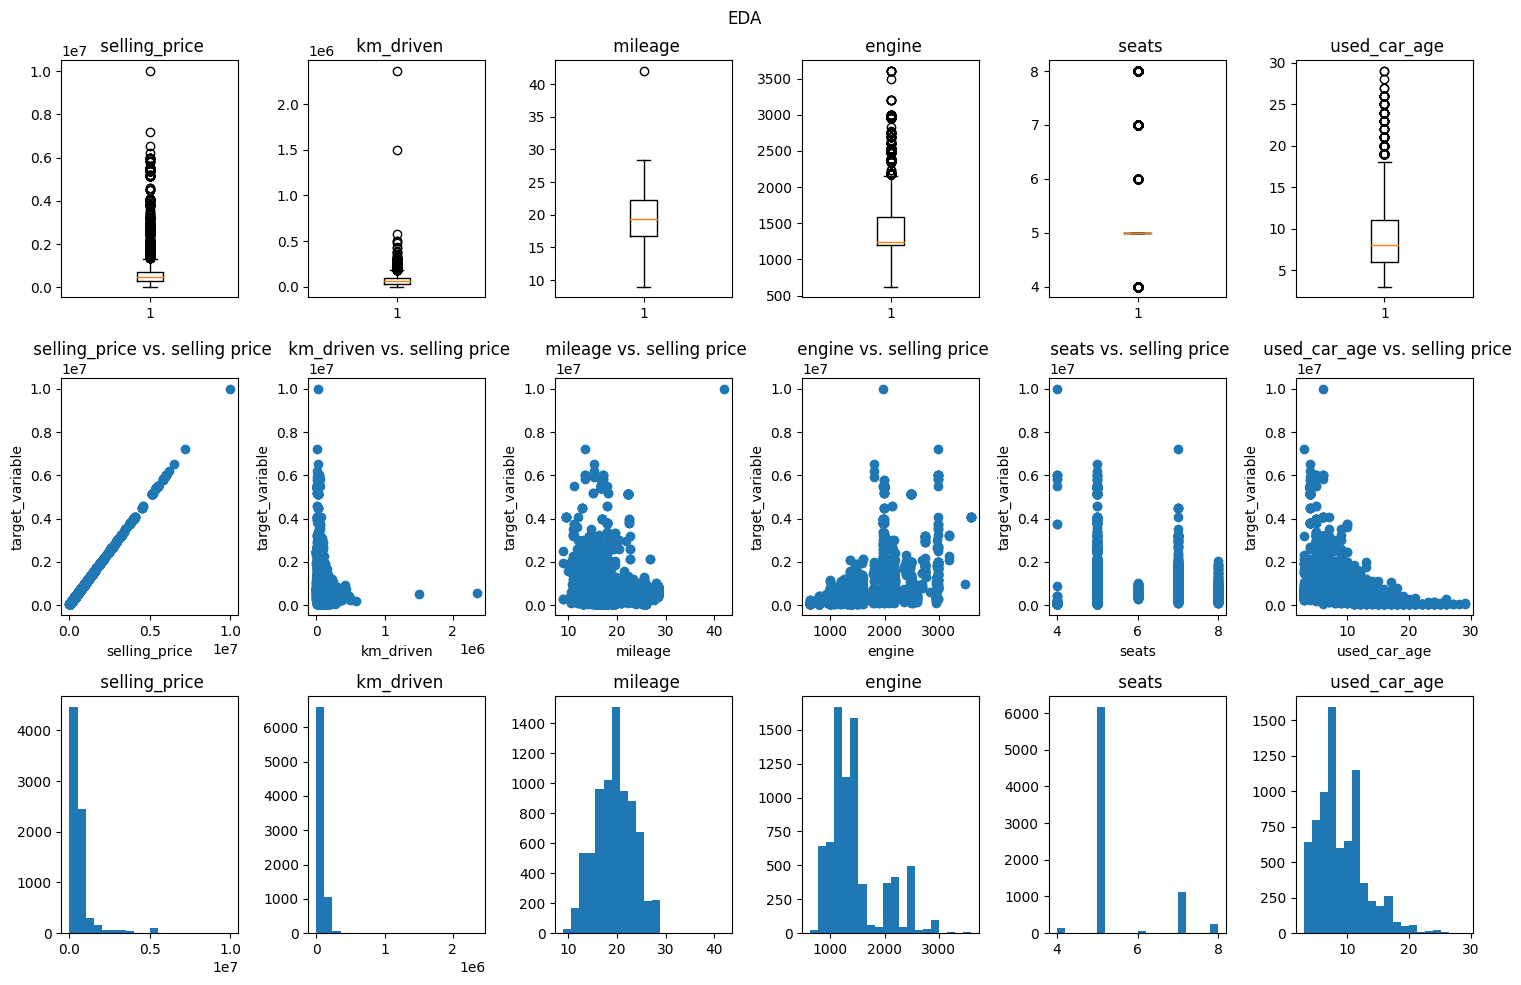

In [213]:
# Select numerical columns
numeric_cols = df_clean.select_dtypes(include=np.number).columns

# Set up subplots
fig, axs = plt.subplots(3, len(numeric_cols), figsize=(15, 10))
fig.suptitle("EDA")

# Box plot
for i, col in enumerate(numeric_cols):
    axs[0, i].boxplot(df_clean[col])
    axs[0, i].set_title(f" {col}")

# Scatter plot
for i, col in enumerate(numeric_cols):
    axs[1, i].scatter(df_clean[col], df_clean["selling_price"])
    axs[1, i].set_xlabel(col)
    axs[1, i].set_ylabel("target_variable")
    axs[1, i].set_title(f" {col} vs. selling price")

# Histogram
for i, col in enumerate(numeric_cols):
    axs[2, i].hist(df_clean[col], bins=20)
    axs[2, i].set_title(f" {col}")

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

It looks like there's outliers for selling_price, km_driven, mileage, and used_car_age. We'll need to check more throughly for outliers.

In [214]:
#Create function to identify by calculate the upper and lower limits of outliers

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile
    low_limit = quartile1 - 1.5 * interquartile
    return low_limit, up_limit

def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)]
    num_outliers = len(outliers)
    print(f"Number of outliers in column '{col_name}': {num_outliers}")
    return outliers


In [215]:
# Check how many outliers on columns
number_of_outliers = check_outliers(df_clean, "selling_price")
number_of_outliers = check_outliers(df_clean, "km_driven")
number_of_outliers = check_outliers(df_clean, "mileage")
number_of_outliers = check_outliers(df_clean, "used_car_age")

Number of outliers in column 'selling_price': 590
Number of outliers in column 'km_driven': 192
Number of outliers in column 'mileage': 1
Number of outliers in column 'used_car_age': 163


It turns out there's some outliers

In [216]:
# Create function to remove outliers
def remove_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    dataframe = dataframe[(dataframe[col_name] >= low_limit) & (dataframe[col_name] <= up_limit)]
    return dataframe

In [217]:
# Remove the rows that contains outliers
df_clean = remove_outliers(df_clean, "selling_price")
df_clean = remove_outliers(df_clean, "km_driven")
df_clean = remove_outliers(df_clean, "mileage")
df_clean = remove_outliers(df_clean, "used_car_age")

Showing data after remove outliers

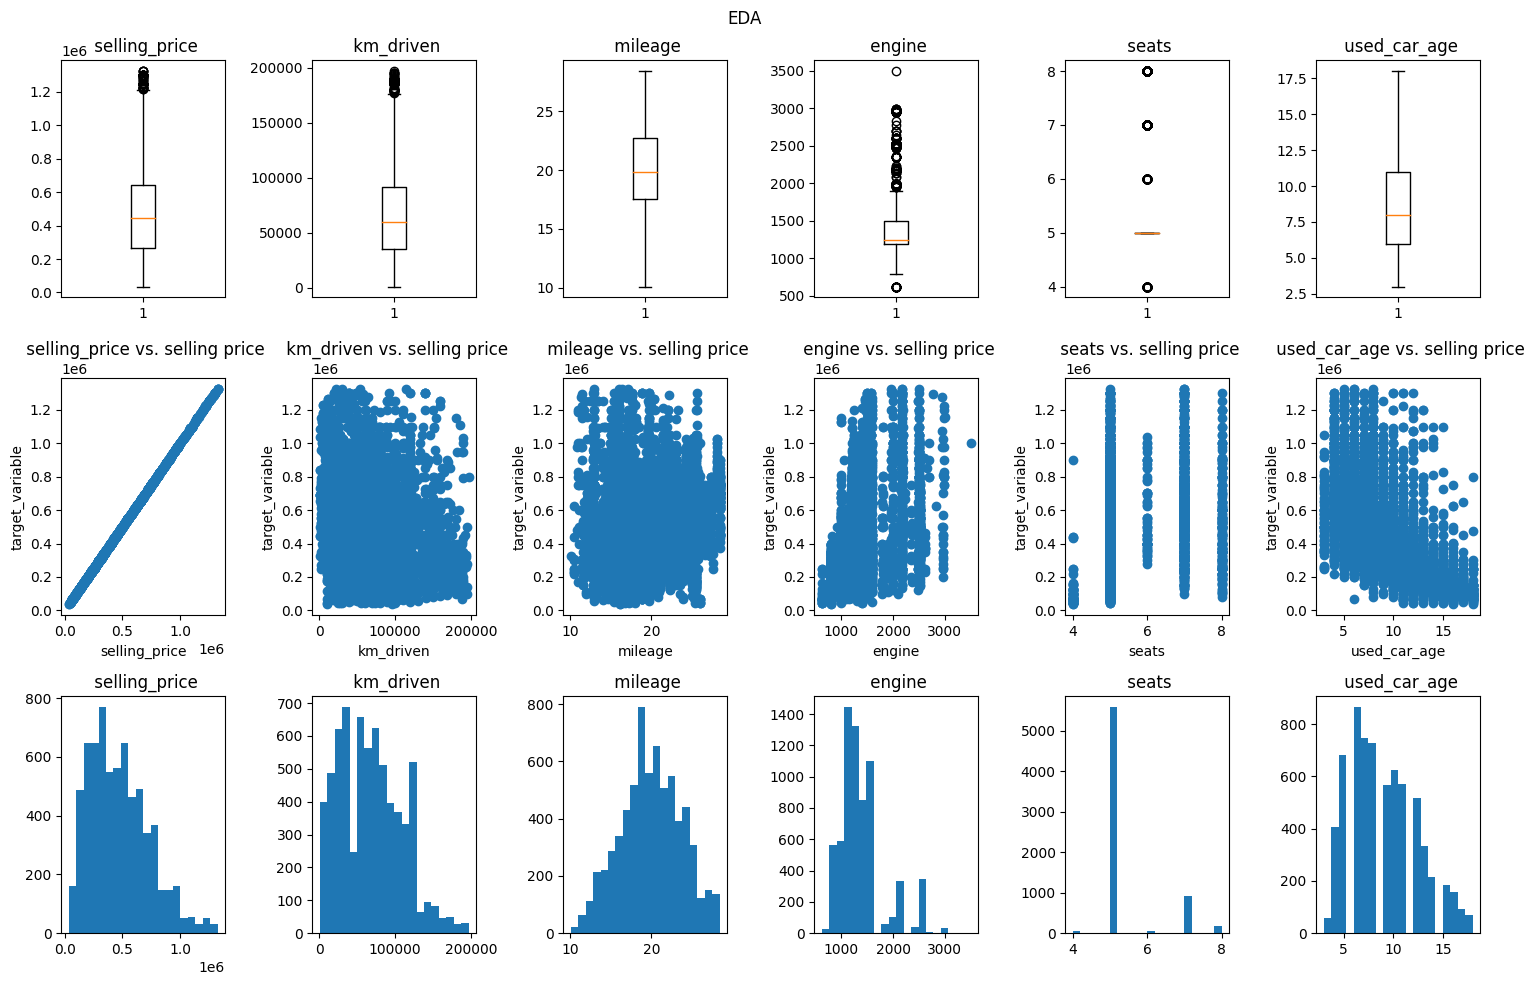

In [218]:
# Select numerical columns
numeric_cols = df_clean.select_dtypes(include=np.number).columns

# Set up subplots
fig, axs = plt.subplots(3, len(numeric_cols), figsize=(15, 10))
fig.suptitle("EDA")

# Box plot
for i, col in enumerate(numeric_cols):
    axs[0, i].boxplot(df_clean[col])
    axs[0, i].set_title(f" {col}")

# Scatter plot
for i, col in enumerate(numeric_cols):
    axs[1, i].scatter(df_clean[col], df_clean["selling_price"])
    axs[1, i].set_xlabel(col)
    axs[1, i].set_ylabel("target_variable")
    axs[1, i].set_title(f" {col} vs. selling price")

# Histogram
for i, col in enumerate(numeric_cols):
    axs[2, i].hist(df_clean[col], bins=20)
    axs[2, i].set_title(f" {col}")

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

There should be no more outliers in the data now

In [219]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6811 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6811 non-null   int64  
 1   km_driven      6811 non-null   int64  
 2   fuel           6811 non-null   object 
 3   seller_type    6811 non-null   object 
 4   transmission   6811 non-null   object 
 5   owner          6811 non-null   object 
 6   mileage        6811 non-null   float64
 7   engine         6811 non-null   int64  
 8   seats          6811 non-null   int64  
 9   used_car_age   6811 non-null   int32  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 558.7+ KB


In [220]:
total_rows_df = len(df)
total_rows_df_clean = len(df_clean)

percentage_diff = ((total_rows_df_clean / total_rows_df) - 1)
print(f"Number of rows at the beginning : {total_rows_df}")
print(f"Number of rows after data cleaning : {total_rows_df_clean}")
print(f"% Difference : {percentage_diff:.2%}")

Number of rows at the beginning : 8128
Number of rows after data cleaning : 6811
% Difference : -16.20%


Exploratory Data Analysis

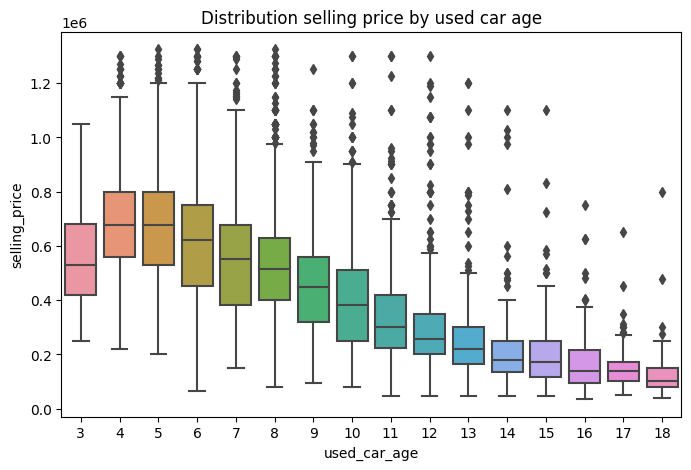

In [221]:
# Distribution selling_price based on used_car_age by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "used_car_age", y = "selling_price", hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by used car age")
plt.show()

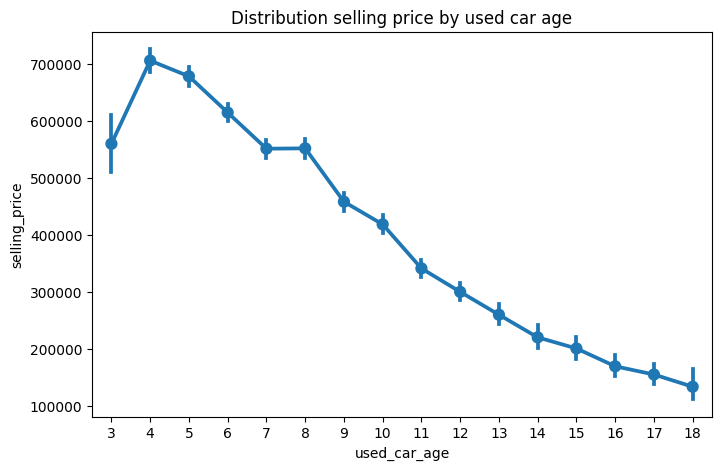

In [222]:
# Distribution selling_price based on used_car_age by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "used_car_age", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by used car age")
plt.show()

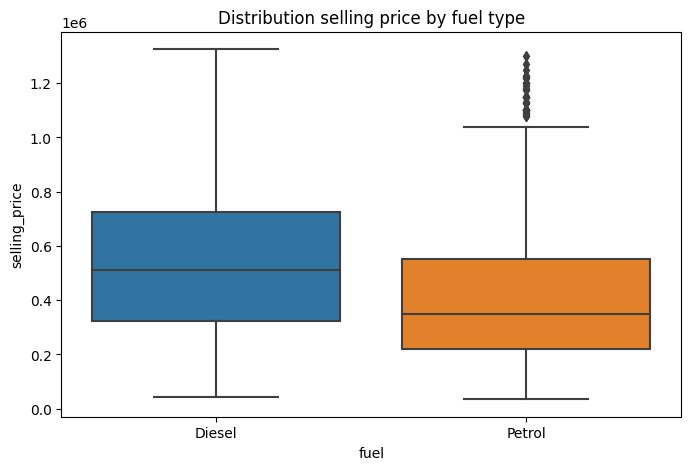

In [223]:
# Distribution selling_price based on fuel by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "fuel", y = "selling_price" , hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by fuel type")
plt.show()

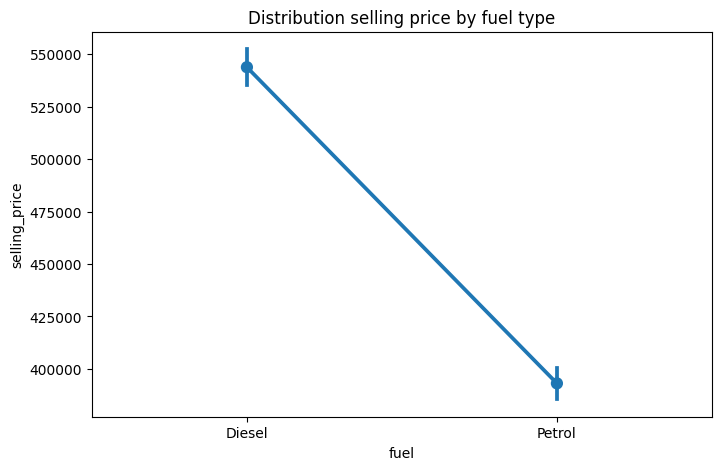

In [224]:
# Distribution selling_price based on fuel by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "fuel", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by fuel type")
plt.show()

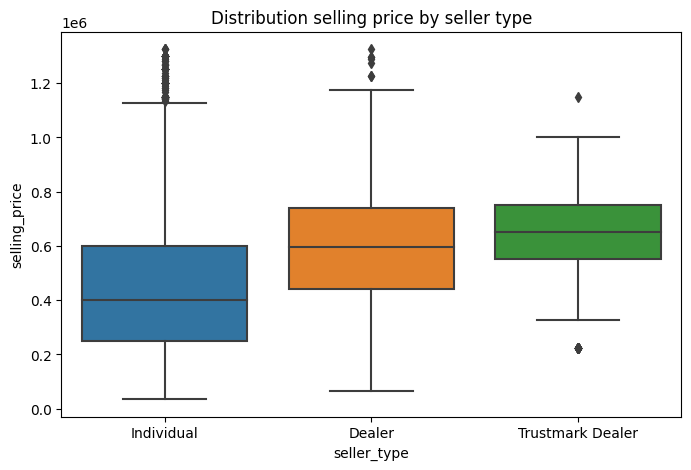

In [225]:
# Distribution selling_price based on seller_type by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "seller_type", y = "selling_price" , hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by seller type")
plt.show()

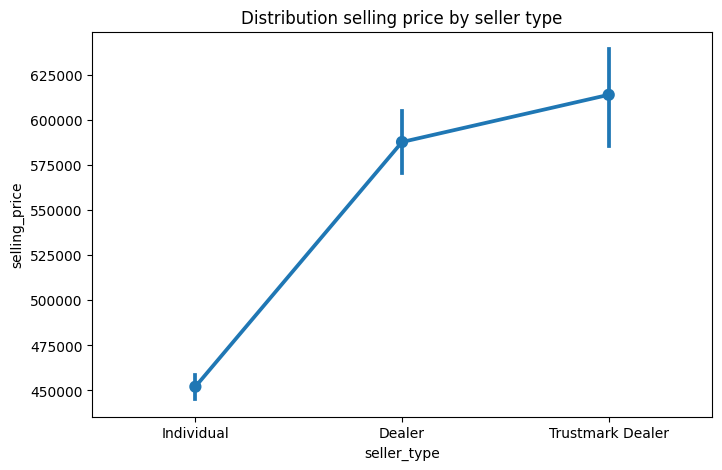

In [226]:
# Distribution selling_price based on fuel by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "seller_type", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by seller type")
plt.show()

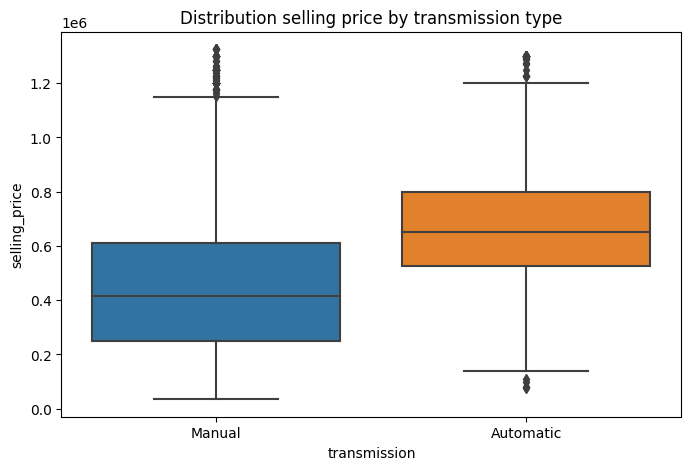

In [227]:
# Distribution selling_price based on seller_type by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "transmission", y = "selling_price" , hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by transmission type")
plt.show()

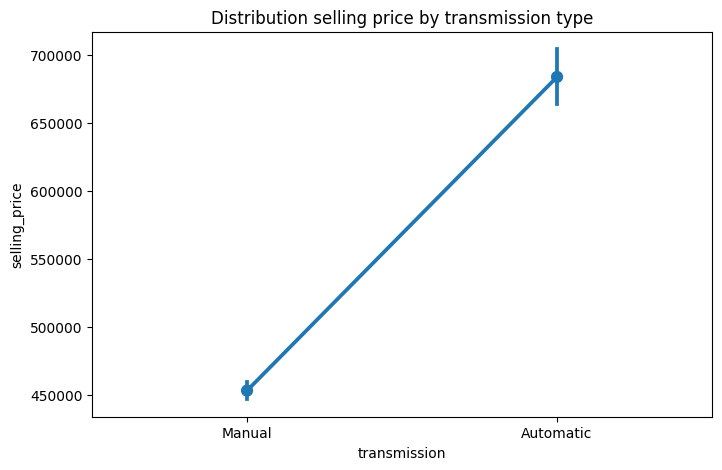

In [228]:
# Distribution selling_price based on fuel by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "transmission", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by transmission type")
plt.show()

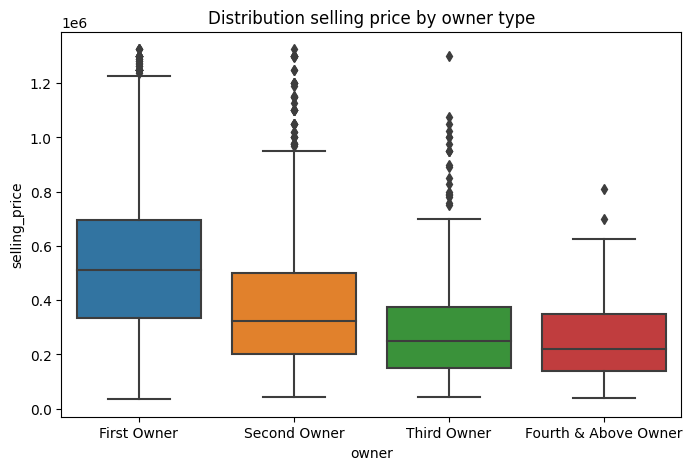

In [229]:
# Distribution selling_price based on seller_type by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "owner", y = "selling_price" , hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by owner type")
plt.show()

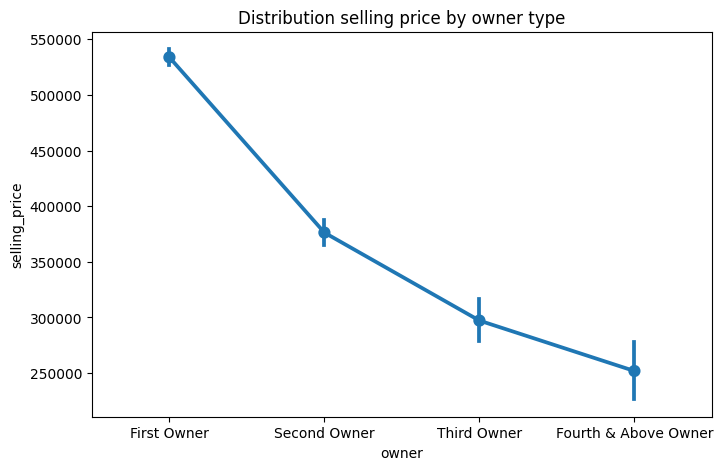

In [230]:
# Distribution selling_price based on fuel by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "owner", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by owner type")
plt.show()

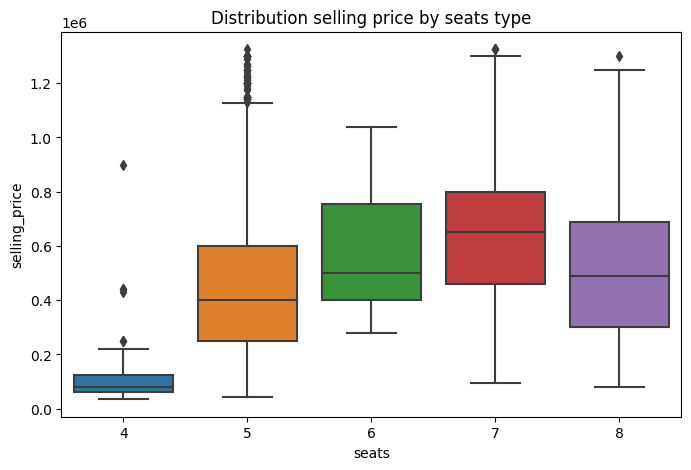

In [231]:
# Distribution selling_price based on seller_type by boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "seats", y = "selling_price" , hue = None, data = df_clean, ax = ax)
ax.set_title("Distribution selling price by seats type")
plt.show()

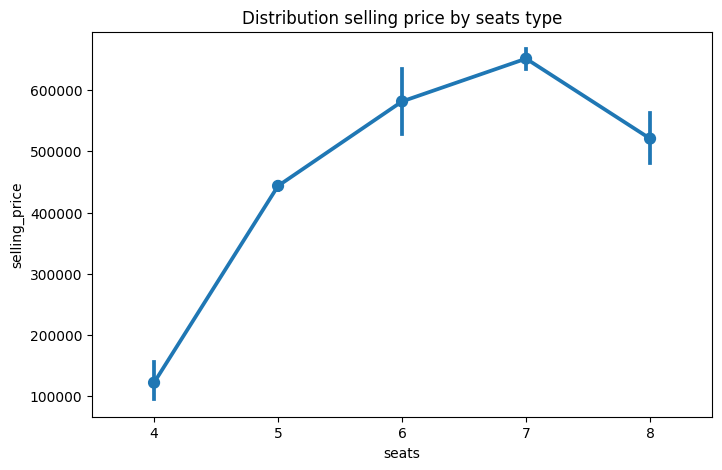

In [232]:
# Distribution selling_price based on fuel by pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(x = "seats", y = "selling_price", data = df_clean, ax = ax)
ax.set_title("Distribution selling price by seats type")
plt.show()

Statistical Test

Hypothesis Tests on Selling Price by fuel type

In [233]:
# Split data based on fuel
diesel_group = df_clean[df_clean["fuel"] == "Diesel"]["selling_price"] #Variable for diesel
petrol_group = df_clean[df_clean["fuel"] == "Petrol"]["selling_price"] #Variable fir petrol

# Perform t-test
t_stat, p_value = stats.ttest_ind(diesel_group, petrol_group, equal_var=False)

print("Hypothesis test result")
print(f"sample size for diesel {diesel_group.shape[0]}")
print(f"sample size for petrol {petrol_group.shape[0]}")
print("-"*40)

# Set significance level
alpha = 0.05

# Hypothesis statement
print("Hypothesis:")
print("H0 = Used car price with fuel type diesel <= Used car price with fuel type petrol")
print("H1 = Used car price with fuel type diesel > Used car price with fuel type petrol")
print("-"*40)
# Print results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)
print(f"alpha : {alpha}")
print("-"*40)

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
print("Based on t-test, it can be concluded:")
if p_value < alpha:
    print("Null hypothesis rejected")
else:
    print("Null hypothesis not rejected")


Hypothesis test result
sample size for diesel 3571
sample size for petrol 3240
----------------------------------------
Hypothesis:
H0 = Used car price with fuel type diesel <= Used car price with fuel type petrol
H1 = Used car price with fuel type diesel > Used car price with fuel type petrol
----------------------------------------
t-statistic:  25.62565462232831
p-value:  2.752725671450283e-138
alpha : 0.05
----------------------------------------
Based on t-test, it can be concluded:
Null hypothesis rejected


Hypothesis tests on selling price by transmission type

In [234]:
# Split data based on fuel
manual_group = df_clean[df_clean["transmission"] == "Manual"]["selling_price"] #Variable for manual
auto_group = df_clean[df_clean["transmission"] == "Automatic"]["selling_price"] #Variable fir automatic

# Perform t-test
t_stat, p_value = stats.ttest_ind(manual_group, auto_group, equal_var=False)

print("Hypothesis test result")
print(f"sample size for manual {manual_group.shape[0]}")
print(f"sample size for automatic {auto_group.shape[0]}")
print("-"*40)

# Set significance level
alpha = 0.05

# Hypothesis statement
print("Hypothesis:")
print("H0 = Used car price with transmission type manual <= Used car price with type automatic")
print("H1 = Used car price with transmission type automatic > Used car price with transmission type manual")
print("-"*40)
# Print results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)
print(f"alpha : {alpha}")
print("-"*40)

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
print("Based on t-test, it can be concluded:")
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")


Hypothesis test result
sample size for manual 6258
sample size for automatic 553
----------------------------------------
Hypothesis:
H0 = Used car price with transmission type manual <= Used car price with type automatic
H1 = Used car price with transmission type automatic > Used car price with transmission type manual
----------------------------------------
t-statistic:  -21.018078899494657
p-value:  2.4232236210803974e-75
alpha : 0.05
----------------------------------------
Based on t-test, it can be concluded:
Reject H0


Hypothesis tests on selling price by seller type

In [235]:
# Perform ANOVA test
model = ols("selling_price ~ seller_type", data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Set significance level
alpha = 0.05

# show results
p_value = anova_table.loc["seller_type", "PR(>F)"]

# Hypothesis statement
print("Hypothesis:")
print("H0 = There is no significant difference in the average selling_price between seller_type")
print("H1 = There is a significant difference in the average selling_price between at least two seller_type")
print("-"*105)
# Print results
print("p-value: ", p_value)
print(f"alpha : {alpha}")
print("-"*105)

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
print("Based on ANOVA test, it can be concluded:")
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

Hypothesis:
H0 = There is no significant difference in the average selling_price between seller_type
H1 = There is a significant difference in the average selling_price between at least two seller_type
---------------------------------------------------------------------------------------------------------
p-value:  4.8641946035899874e-57
alpha : 0.05
---------------------------------------------------------------------------------------------------------
Based on ANOVA test, it can be concluded:
Reject H0


Hypothesis tests on selling price by owner type

In [236]:
# Perform ANOVA test
model = ols("selling_price ~ owner", data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Set significance level
alpha = 0.05

# show results
p_value = anova_table.loc["owner", "PR(>F)"]

# Hypothesis statement
print("Hypothesis:")
print("H0 = There is no significant difference in the average selling_price between owner type")
print("H1 = There is a significant difference in the average selling_price between at least two owner type")
print("-"*105)
# Print results
print("p-value: ", p_value)
print(f"alpha : {alpha}")
print("-"*105)

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
print("Based on ANOVA test, it can be concluded:")
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

Hypothesis:
H0 = There is no significant difference in the average selling_price between owner type
H1 = There is a significant difference in the average selling_price between at least two owner type
---------------------------------------------------------------------------------------------------------
p-value:  4.0097115367599766e-185
alpha : 0.05
---------------------------------------------------------------------------------------------------------
Based on ANOVA test, it can be concluded:
Reject H0


Hypothesis tests on selling price by seats type

In [237]:
# Perform ANOVA test
model = ols("selling_price ~ seats", data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Set significance level
alpha = 0.05

# show results
p_value = anova_table.loc["seats", "PR(>F)"]

# Hypothesis statement
print("Hypothesis:")
print("H0 = There is no significant difference in the average selling_price between seats type")
print("H1 = There is a significant difference in the average selling_price between at least two seats type")
print("-"*105)
# Print results
print("p-value: ", p_value)
print(f"alpha : {alpha}")
print("-"*105)

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
print("Based on ANOVA test, it can be concluded:")
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

Hypothesis:
H0 = There is no significant difference in the average selling_price between seats type
H1 = There is a significant difference in the average selling_price between at least two seats type
---------------------------------------------------------------------------------------------------------
p-value:  5.517730526041611e-113
alpha : 0.05
---------------------------------------------------------------------------------------------------------
Based on ANOVA test, it can be concluded:
Reject H0


Correlation Matrix

Creating variable dummy for categorical variable

In [238]:
# Convert to dummy variable
convert = pd.get_dummies(data=df_clean, columns=["fuel", "seller_type", "transmission", "owner"])
convert = convert.astype(int)

convert.head()

,selling_price,km_driven,mileage,engine,seats,used_car_age,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
0,450000,145500,23,1248,5,9,1,0,0,1,0,0,1,1,0,0,0
1,370000,120000,21,1498,5,9,1,0,0,1,0,0,1,0,0,1,0
2,158000,140000,17,1497,5,17,0,1,0,1,0,0,1,0,0,0,1
3,225000,127000,23,1396,5,13,1,0,0,1,0,0,1,1,0,0,0
4,130000,120000,16,1298,5,16,0,1,0,1,0,0,1,1,0,0,0


In [239]:
# Calculate correlation matrix
correlation = convert.corr()

# SHow result
correlation

,selling_price,km_driven,mileage,engine,seats,used_car_age,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
selling_price,1.000000,-0.252156,0.032153,0.395958,0.268714,-0.622542,0.294041,-0.294041,0.160638,-0.192688,0.097318,0.245819,-0.245819,0.331820,-0.116221,-0.223675,-0.178985
km_driven,-0.252156,1.000000,-0.202751,0.326072,0.218408,0.533384,0.420022,-0.420022,-0.135797,0.184353,-0.126253,-0.164062,0.164062,-0.360562,0.105221,0.256121,0.182416
mileage,0.032153,-0.202751,1.000000,-0.561627,-0.472614,-0.391484,0.162885,-0.162885,0.076441,-0.036444,-0.066915,-0.091291,0.091291,0.196393,-0.065061,-0.133748,-0.105504
engine,0.395958,0.326072,-0.561627,1.000000,0.648063,0.126104,0.512739,-0.512739,0.008460,-0.016983,0.019135,0.062821,-0.062821,-0.095537,0.019225,0.085641,0.021092
seats,0.268714,0.218408,-0.472614,0.648063,1.000000,0.023979,0.333040,-0.333040,-0.050436,0.050612,-0.010292,-0.055263,0.055263,-0.044568,0.005408,0.044853,0.002963
used_car_age,-0.622542,0.533384,-0.391484,0.126104,0.023979,1.000000,0.042720,-0.042720,-0.135401,0.176274,-0.110430,-0.158045,0.158045,-0.485372,0.171289,0.326887,0.261645
fuel_Diesel,0.294041,0.420022,0.162885,0.512739,0.333040,0.042720,1.000000,-1.000000,0.015745,0.047167,-0.125833,-0.136632,0.136632,-0.082854,0.013378,0.081520,0.007056
fuel_Petrol,-0.294041,-0.420022,-0.162885,-0.512739,-0.333040,-0.042720,-1.000000,1.000000,-0.015745,-0.047167,0.125833,0.136632,-0.136632,0.082854,-0.013378,-0.081520,-0.007056
seller_type_Dealer,0.160638,-0.135797,0.076441,0.008460,-0.050436,-0.135401,0.015745,-0.015745,1.000000,-0.873405,-0.062504,0.146217,-0.146217,0.179741,-0.048039,-0.132006,-0.085549
seller_type_Individual,-0.192688,0.184353,-0.036444,-0.016983,0.050612,0.176274,0.047167,-0.047167,-0.873405,1.000000,-0.431451,-0.209779,0.209779,-0.195477,0.055002,0.138979,0.099778


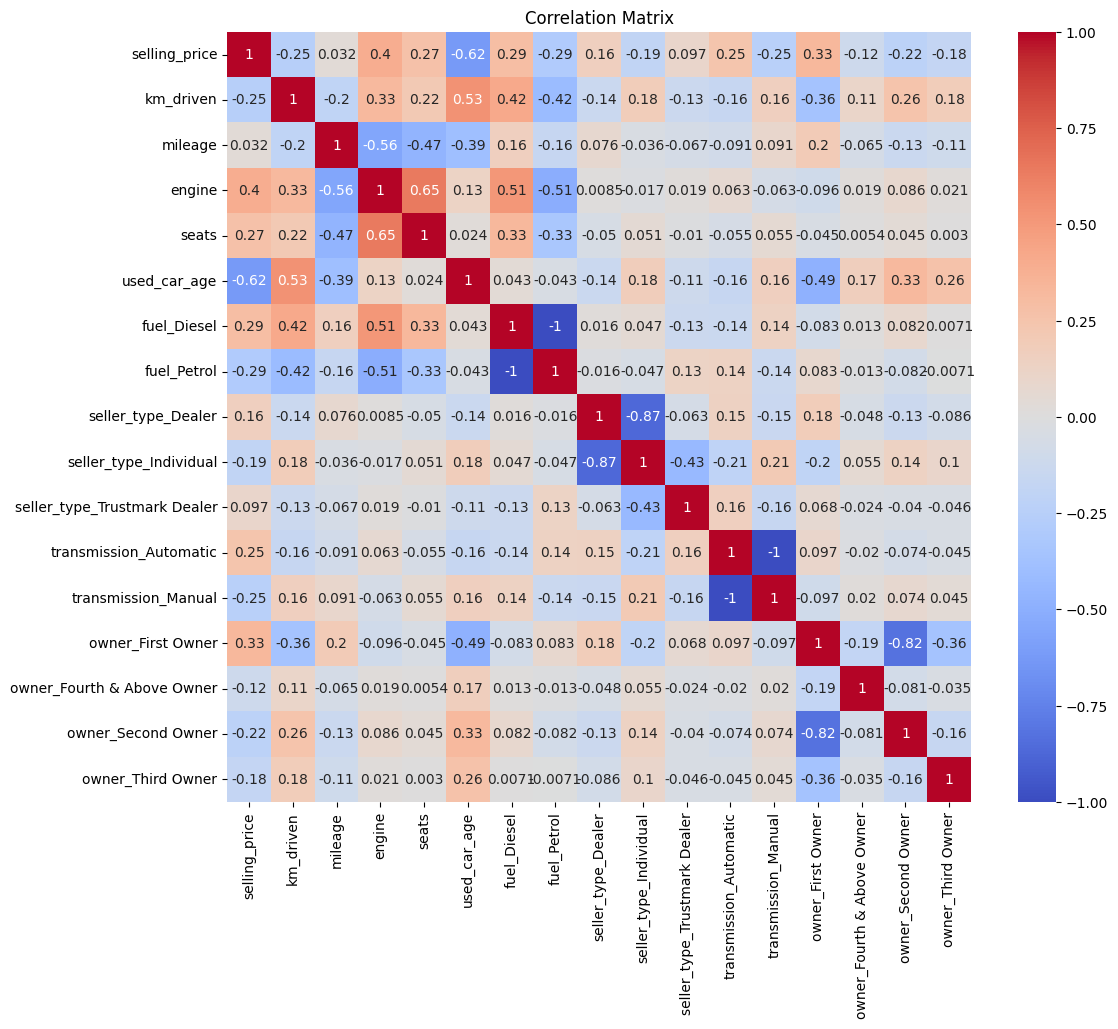

In [240]:
# Configure plot size
plt.figure(figsize=(12, 10))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

# Show result
plt.show()

In [241]:
# Drop columns that has low correlation
df_clean = convert.drop(columns=["seats", "km_driven", "mileage", "seller_type_Dealer", "seller_type_Individual", "seller_type_Trustmark Dealer", "owner_Fourth & Above Owner", "owner_Second Owner", "owner_Third Owner"])

df_clean.head()

,selling_price,engine,used_car_age,fuel_Diesel,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First Owner
0,450000,1248,9,1,0,0,1,1
1,370000,1498,9,1,0,0,1,0
2,158000,1497,17,0,1,0,1,0
3,225000,1396,13,1,0,0,1,1
4,130000,1298,16,0,1,0,1,1


Regression Model

In [242]:
# Separating the dependent variable and the predictor variable
y = df_clean["selling_price"]
X = df_clean.drop("selling_price", axis=1)

# Adding constants to predictor variables
X = sm.add_constant(X)

# Building the OLS regression model
model = sm.OLS(y, X)

# Fitting models to data
results = model.fit()

# Displays the model summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2465.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:13:18   Log-Likelihood:                -90960.
No. Observations:                6811   AIC:                         1.819e+05
Df Residuals:                    6805   BIC:                         1.820e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.95